<a href="https://colab.research.google.com/github/cdromcom/3actresearch/blob/master/study_2_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and require packages


Install packages to clean, explore, and analyze data.

In [0]:
install.packages("readr")
install.packages("readxl")
install.packages("tidyverse")
install.packages("ggpubr")
install.packages("stargazer")

In [0]:
install.packages("rstatix")

In [79]:
install.packages("formattable")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [0]:
library(rstatix)
library(readr)
library(readxl)

library(tidyverse)
library(ggpubr)

In [0]:
library(formattable)

# Clean and summarize data


Using an Excel (.xlsx) file.

In [0]:
s2ratings <- read_excel("/s2ratings.xlsx")

In [88]:
studytwoNew <- s2ratings %>%
  gather(key = "soundType", value = "rating", notAnnoying, engine, hum, horn, noNoise, exhaust, driverSelects, whiteNoise, musicAny, musicClassical, beep, click, whistle, siren) %>%
  convert_as_factor(id, soundType)

summary(studytwoNew)

       id               soundType        rating     
 1      :  14   beep         : 316   Min.   :0.000  
 2      :  14   click        : 316   1st Qu.:0.000  
 3      :  14   driverSelects: 316   Median :1.000  
 4      :  14   engine       : 316   Mean   :1.193  
 5      :  14   exhaust      : 316   3rd Qu.:2.000  
 6      :  14   horn         : 316   Max.   :4.000  
 (Other):4340   (Other)      :2528                  

In [87]:
studytwoNew %>%
  group_by(soundType) %>%
  get_summary_stats(rating, type = "common")

soundType,variable,n,min,max,median,iqr,mean,sd,se,ci
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
beep,rating,316,0,4,0,1,0.741,1.070,0.060,0.118
click,rating,316,0,4,0,1,0.709,0.962,0.054,0.106
driverSelects,rating,316,0,4,1,1,1.066,1.316,0.074,0.146
engine,rating,316,0,4,2,2,1.801,1.288,0.072,0.143
exhaust,rating,316,0,4,1,1,1.171,1.207,0.068,0.134
horn,rating,316,0,4,1,2,1.453,1.467,0.083,0.162
hum,rating,316,0,4,2,2,1.741,1.344,0.076,0.149
musicAny,rating,316,0,4,1,1,1.003,1.269,0.071,0.140
musicClassical,rating,316,0,4,1,1,0.804,1.135,0.064,0.126


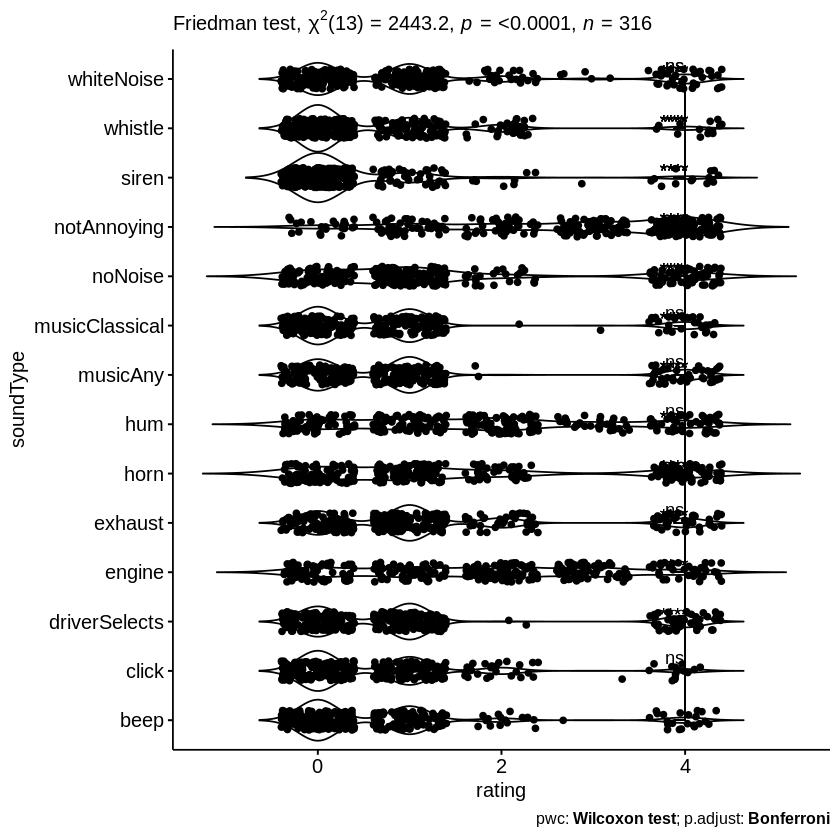

In [63]:

ggviolin(studytwoNew, x = "soundType", y = "rating", add = "jitter")+
  stat_pvalue_manual(pwc, hide.ns = FALSE) +
  coord_flip()+
  labs(
    subtitle = get_test_label(res.fried, detailed = TRUE),
    caption = get_pwc_label(pwc)
  )

In [86]:
shapiro_test(studytwoNew, rating)

variable,statistic,p
<chr>,<dbl>,<dbl>
rating,0.7753039,2.872986e-61


Shapiro test is statistically significant. Normality assumption is violated.

# Friedman test and post-hoc analyses

For a non-parametric version of an RM ANOVA, the Friedman test is appropriate.

In [51]:
res.fried <- studytwoNew %>% friedman_test(rating ~ soundType |id)

res.fried

,.y.,n,statistic,df,p,method
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,rating,316,2443.199,13,0,Friedman test


Calculate the effect size (moderate-to-large here).

In [52]:
studytwoNew %>% friedman_effsize(rating ~ soundType |id, ci = TRUE, conf.level = 0.99, ci.type = "perc", nboot = 1000)

,.y.,n,effsize,conf.low,conf.high,method,magnitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<ord>
1,rating,316,0.5947418,0.55,0.64,Kendall W,large


Conduct post-hoc analyses using the Wilcoxon test and adjust p-values using the Bonferroni procedure.


In [53]:
pwc <- studytwoNew %>%
  wilcox_test(rating ~ soundType, paired = TRUE, p.adjust.method = "bonferroni")

pwc

,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,rating,beep,click,316,316,93.0,5.70e-02,1.00e+00,ns
2,rating,beep,driverSelects,316,316,0.0,4.47e-14,4.07e-12,****
3,rating,beep,engine,316,316,0.0,7.52e-42,6.84e-40,****
4,rating,beep,exhaust,316,316,0.0,6.27e-26,5.71e-24,****
5,rating,beep,horn,316,316,0.0,1.16e-29,1.06e-27,****
6,rating,beep,hum,316,316,0.0,1.04e-41,9.46e-40,****
7,rating,beep,musicAny,316,316,0.0,2.14e-12,1.95e-10,****
8,rating,beep,musicClassical,316,316,80.5,3.00e-03,2.83e-01,ns
9,rating,beep,noNoise,316,316,0.0,2.23e-25,2.03e-23,****


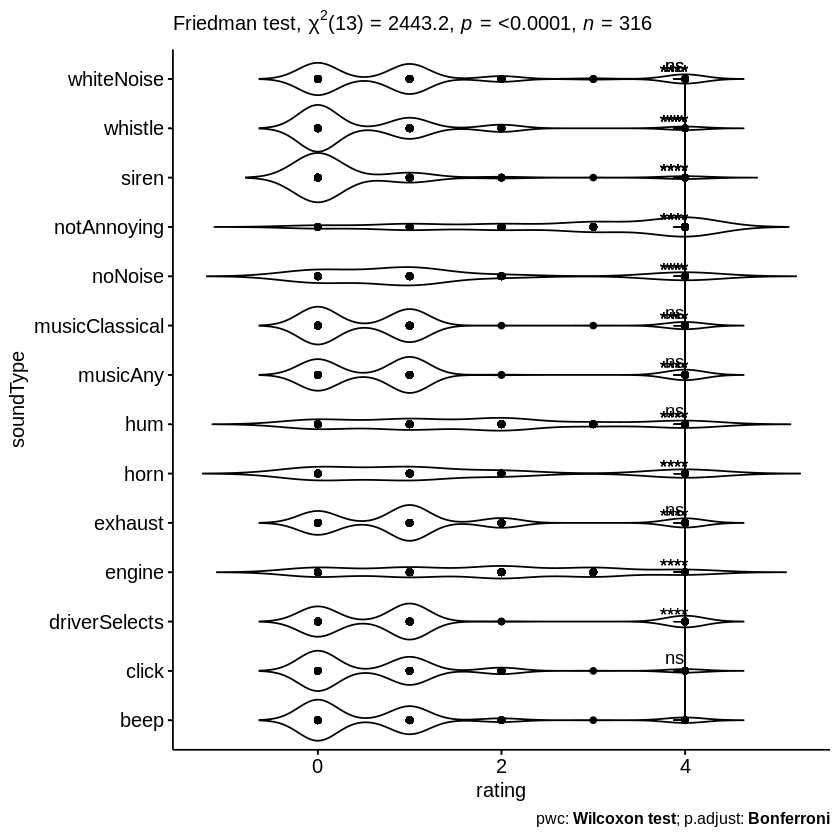

In [58]:
pwc <- pwc %>% add_xy_position(x = "time")
ggviolin(studytwoNew, x = "soundType", y = "rating", add = "point") +
  stat_pvalue_manual(pwc, hide.ns = FALSE) +
  coord_flip()+
  labs(
    subtitle = get_test_label(res.fried, detailed = TRUE),
    caption = get_pwc_label(pwc)
  )

# Power and Sensitivity Analyses

The "retrodesign" package from [R CRAN](https://cran.r-project.org/web/packages/retrodesign/index.html) implements the calculation of Type S and Type M errors as advised by [Gelman and Carlin, 2014](https://cran.r-project.org/web/packages/retrodesign/vignettes/Intro_To_retrodesign.html).

In [64]:
# Type S and Type M Error Analysis
install.packages("retrodesign")
library(retrodesign)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Compute Type S and Type M errors for effect sizes ranging from .20 to 1.0. SE from the post-hoc analyses above is around 0.06.

In [65]:
errors <- retro_design(list(.20,.40,.60,.80, 1.0),0.06)

errors

effect_size,power,type_s,type_m
<list>,<list>,<list>,<list>
0.2,0.9151813,6.563201e-08,1.050928
0.4,0.9999987,3.159295e-18,1.000001
0.6,1,2.879345e-33,1
0.8,1,4.23742e-53,1
1,1,9.772379e-78,1
